# 1. Warm-Up

In [18]:
using JuMP, Clp, ECOS, SCS

m = Model()

@variable(m, 0 <= x[1:3] <= 3)
@constraint(m, x[2] + x[3] - 2x[1] <= 0)
@objective(m, Max, 5x[1] - x[2] + 11x[3])

setsolver(m, ClpSolver())
status = solve(m)
println("Using Clp Solver: ", status)
println("x1: ", getvalue(x[1]))
println("x2: ", getvalue(x[2]))
println("x3: ", getvalue(x[3]))
println("max: ", getobjectivevalue(m))
@time for i = 1:1000
    solve(m)
end
println()

setsolver(m, ECOSSolver(verbose=false))
status = solve(m)
println("Using ECOS Solver: ", status)
println("x1: ", getvalue(x[1]))
println("x2: ", getvalue(x[2]))
println("x3: ", getvalue(x[3]))
println("max: ", getobjectivevalue(m))
@time for i = 1:1000
    solve(m)
end
println()

setsolver(m, SCSSolver(verbose=false))
status = solve(m)
println("Using SCS Solver: ", status)
println("x1: ", getvalue(x[1]))
println("x2: ", getvalue(x[2]))
println("x3: ", getvalue(x[3]))
println("max: ", getobjectivevalue(m))
@time for i = 1:1000
    solve(m)
end
println()

Using Clp Solver: Optimal
x1: 3.0
x2: 0.0
x3: 3.0
max: 48.0
  0.267222 seconds (36.00 k allocations: 2.411 MiB)

Using ECOS Solver: Optimal
x1: 2.999999998571697
x2: 8.223270148055816e-9
x3: 3.000000000197723
max: 47.999999986810174
  0.568201 seconds (489.00 k allocations: 27.909 MiB, 30.20% gc time)

Using SCS Solver: Optimal
x1: 2.9999856529908175
x2: 4.149724927436506e-6
x3: 3.0000130627112145
max: 48.000067805052524
  0.515443 seconds (396.00 k allocations: 23.766 MiB, 3.09% gc time)



Comparing the three solvers above, the most accurate and fastest (over 1000 runs) is Clp. 
Clp is specialized for linear programs, as opposed to SCS (an SDP solver) and ECOS (a SOCP solver), so it is to be expected that it would be the quickest and produce the most accurate result.

# 2. Crop Planning

### part a

In [42]:
using JuMP, Clp

n = Model(solver = ClpSolver())

@variable(n, w >= 0) #number of wheat acres
@variable(n, c >= 0) #number of corn acres
@constraint(n, w + c <= 45) #land limitation
@constraint(n, 3w + 2c <= 100) #labor limitation
@constraint(n, 2w + 4c <= 120) #fertilizer limitation
@objective(n, Max, 200w + 300c) #profit

status = solve(n)
println("Jane should plant ", getvalue(w), " acres of wheat and ", getvalue(c), " acres of corn")
println("to achieve a maximum profit of: \$", getobjectivevalue(n))

Jane should plant 19.99999999999999 acres of wheat and 20.000000000000007 acres of corn
to achieve a maximum profit of: $10000.0


### part b

In [66]:
crops = [:wheat, :corn]

labor   = Dict( :wheat => 3, :corn => 2)

fert = Dict( :wheat => 2, :corn => 4)

acres = Dict( :wheat => 1, :corn => 1)

profit = Dict( :wheat => 200, :corn => 300)

num_acres = 45
num_labor = 100
num_fert = 120

using JuMP, Clp

n = Model(solver = ClpSolver())

@variable(n, z[crops] >= 0)

@expression(n, tot_acres, sum(z[i] * acres[i] for i in crops) )
@expression(n, tot_labor, sum(z[i] * labor[i]    for i in crops) )
@expression(n, tot_fert,  sum(z[i] * fert[i]  for i in crops) )
@expression(n, tot_profit,  sum(z[i] * profit[i]  for i in crops) )

@constraint(n, tot_acres <= num_acres) 
@constraint(n, tot_labor <= num_labor) 
@constraint(n, tot_fert <= num_fert) 

@objective(n, Max, tot_profit) #profit

solve(n)
println(getvalue(z))
println("The maximum profit is: \$", getvalue(tot_profit))

z: 1 dimensions:
[wheat] = 19.99999999999999
[ corn] = 20.000000000000007
The maximum profit is: $10000.0


The results from part (b) match that of part (a) exactly.

### part c

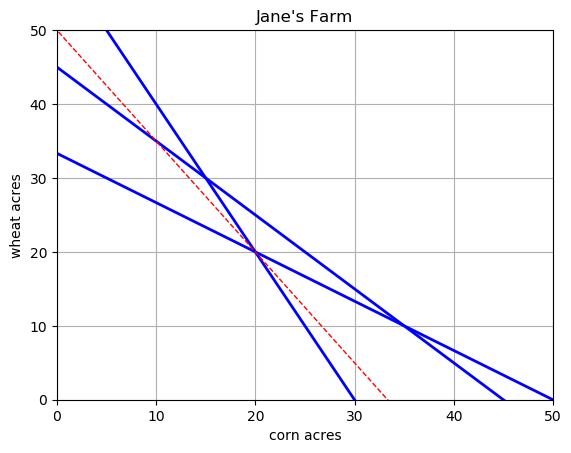

PyObject Text(0.5,1,u"Jane's Farm")

In [64]:
using PyPlot

c = linspace(-50,50,1000)

w1 = 45 - c
w2 = (100/3) - (2/3)c
w3 = 60 - 2c
x2 = 50 - (3/2)c 

plot(c, w1, "b", linewidth = 2)
plot(c, w2, "b", linewidth = 2)
plot(c, w3, "b", linewidth = 2)
plot(c, x2, "r--", linewidth = 1)

xlim([0, 50])
ylim([0, 50]) 

grid() 
xlabel("corn acres") 
ylabel("wheat acres")
title("Jane's Farm")


In this graph, the area bounded by all the constraints (the feasibile set) is the area underneath all three blue lines.

The contour line, represented by the red dotted line, intersects with this area most optimally at the point (20, 20).

This means planting 20 acres of wheat and 20 acres of corn would result in the maximum amount of profit ($10000.0), the same result as we deduced in parts (a) and (b).